# Dot plot of marker expression for cell type

In [19]:
import numpy as np
import scanpy as sc
import pandas as pd
from matplotlib import pyplot as plt
import sys, os
import anndata as ad
import squidpy as sq
import scanpy as sc

other_dir_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(other_dir_path)

import IMCprocess.spatial_analysis.spatial_analysis as sa
import IMCprocess.spatial_analysis.combi_enrich as ce
import IMCprocess.utils.utils as ut

# I have to use custom Img_anndata code
import Img_anndata as ia
import IMCprocess.utils.utils as ut

## Import object for plotting and merge label for level2 in level1 object

In [2]:
data_path = '/Users/pattama/Desktop/UiB/cancer/example_share_code/share_with_vladan/mask_analysis_full_pipeline/example_data/'
data_lev1 = ut.read_pickle_obj(data_path+'00hanna_adata_totalNB_obj_Level1.pkl')
Ep_lev2 = ut.read_pickle_obj(data_path+'02hanna_adata_totalNB_obj_EpLevel2.pkl')
Im_lev2 = ut.read_pickle_obj(data_path+'02hanna_adata_totalNB_obj_ImmuneLevel2.pkl')
Fi_lev2 = ut.read_pickle_obj(data_path+'02hanna_adata_totalNB_obj_Level2.pkl')

In [3]:
# get anndata for level1, epithelial level2, immune level2, fibroblast level2
level1_adata = data_lev1.adata_dict['level1']
Ep_adata = Ep_lev2.adata_dict['Ep_level2']
Im_adata = Im_lev2.adata_dict['Immune_level2']
Fi_adata = Fi_lev2.adata_dict['Fibro_level2']

In [4]:
def add_level2_to_level1_obs(level1_adata, level2_adata_list):
    '''
    Add level2 annotation to level1 adata object
    '''
    level1_adata.obs['level2'] = level1_adata.obs['level1_annotated'].astype(str)
    for lev2_adata in level2_adata_list:
        lev2_col = lev2_adata.obs.columns[lev2_adata.obs.columns.str.contains('level2')][0]
        lev2_adata.obs['level2'] = lev2_adata.obs[
            'level1_annotated'].astype('str') + '_' + lev2_adata.obs[lev2_col].astype('str')
        level1_adata.obs.loc[lev2_adata.obs.level2.index, 'level2'] = lev2_adata.obs.level2
    return level1_adata

In [5]:
add_level2_to_level1_obs(level1_adata=level1_adata, level2_adata_list=[Ep_adata, Im_adata, Fi_adata])

AnnData object with n_obs × n_vars = 132951 × 51
    obs: 'img_id', 'PhenoGraph_clusters', 'level1_annotated', 'level2'
    uns: 'pca', 'PhenoGraph_Q', 'PhenoGraph_k', 'neighbors', 'umap', 'PCs', 'dendrogram_PhenoGraph_clusters', 'PhenoGraph_clusters_colors', 'level1_annotated_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

## dotplot

In [105]:
def plt_dotplot(adata, marker_cell_dict, obs_col, output_path,name):
      fig = sc.pl.dotplot(adata, 
                          marker_cell_dict, 
                          obs_col, dendrogram=True,
                          show=False)
      fig2 = fig['mainplot_ax'].get_figure()
      fig2.tight_layout()
      fig2.savefig(output_path+'/'+obs_col+'_'+name+'_dotplot.png', dpi = 300)

In [18]:
# Check marker name from anndata
level1_adata.var.index

Index(['79Br', '80ArAr', '81Br', '89Y', '113In_ADHL1', '115In_GammaCat',
       '127I', '131Xe', '138Ba', '139La_MCAM', '141Pr_aSMA', '142Nd_CTLA4',
       '143Nd_Vimentin', '144Nd_YAP1', '145Nd_CD45', '146Nd_CD16',
       '147Sm_CD163', '148Nd_PanKeratin', '149Sm_CK5_6', '150Nd_PDL1',
       '151Eu_CD31_CD34', '152Sm_FAP', '153Eu_CD44', '154Sm_CD11c',
       '155Gd_FOXP3', '156Gd_CD4', '158Gd_E_Cad', '159Tb_CD68', '160Gd_PDGFRa',
       '161Dy_pSMAD2', '162Dy_CD8', '163Dy_ER', '164Dy_CD20', '165Ho_PD1',
       '166Er_HER2', '167Er_GATA3', '168Er_Ki67', '169Tm_CD24', '170Er_CD3',
       '171Yb_PDGFRb', '172Yb_CC3', '173Yb_GranzymeB', '174Yb_CK8_18',
       '175Lu_PanActin', '176Yb_HisH3', '191Ir_DNA', '193Ir_DNA', '195Pt_mem1',
       '196Pt_mem2', '198Pt_mem3', '209Bi_pSTAT3'],
      dtype='object')

In [20]:
# Setting name of cell type for makers expression
marker_cell_dict = {
    'T-cell': ['170Er_CD3'],
    'Macrophage': ['159Tb_CD68'],
    'Endothelial': ['151Eu_CD31_CD34'],
    'Fibroblast': ['143Nd_Vimentin'],
    'Epithelial': ['148Nd_PanKeratin'],
}

categories: Amb, Ep_Ca_nonstem, Ep_Ca_stem, etc.
var_group_labels: T-cell, Macrophage, Endothelial, etc.


/Users/pattama/Desktop/UiB/venv_folder/IMCprocess_venv/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/var/folders/_d/_v_3rt457zj_nkkxtccyqtth0000gn/T/ipykernel_10999/658425919.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig2.tight_layout()


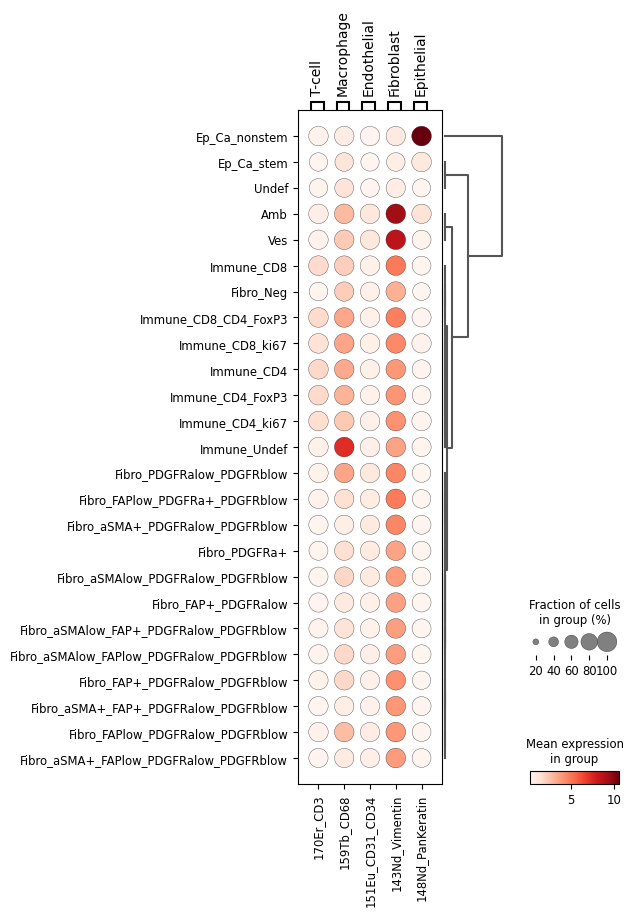

In [55]:
plt_dotplot(adata=level1_adata,
            marker_cell_dict=marker_cell_dict,
            obs_col='level2',
            output_path='03output',
            name='level2')

categories: Amb, Ep, Fibro, etc.
var_group_labels: T-cell, Macrophage, Endothelial, etc.


/Users/pattama/Desktop/UiB/venv_folder/IMCprocess_venv/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/var/folders/_d/_v_3rt457zj_nkkxtccyqtth0000gn/T/ipykernel_10999/658425919.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig2.tight_layout()


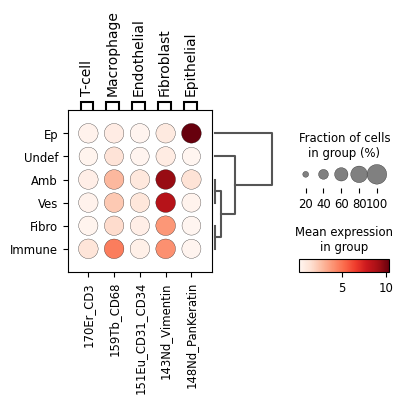

In [107]:
plt_dotplot(adata=level1_adata,
            marker_cell_dict=marker_cell_dict,
            obs_col='level1_annotated',
            output_path='03output',
            name='level1')